# P.E.T - Pet Enhacement Transition

## 1 Justificacion y descripción del proyecto

## 2 Obtención de datos

El datos se ha obtenido de kaggle, dataset [23 Pet Breeds Image Classification](https://www.kaggle.com/datasets/aseemdandgaval/23-pet-breeds-image-classification).  
Pero ha sido modificado manualmente para completarlo, según el interés.

Información de los ficheros: 
* **Inicialmente**:
  * Imagenes de perros y gatos.
  
  * 23 carpetas de razas comunes: 15 de perros y 8 de gatos.
  
  * 170 imagenes por raza, menos mumbai.

* **Añadido modificandolo manualmente**:
  * 3 carpetas con los tipos de tamaño: Grande, mediano o pequeño.

  * 2 carpetas con tipos de edad: Cachorro o adulto.

  * Algunas imagenes duplicadas en distintas carpetas, ya que aparecen cachorros y adultos en la misma imagen.

In [45]:
import os
import pandas as pd
import numpy as np

In [46]:
path = '/content/drive/MyDrive/datasets/Pet_Breeds'

size = os.listdir(path)
#print('Size', size)
pets = pd.DataFrame(columns = ['path', 'labels', 'type'])

for s in size:
  #print('Size', s)
  breeds = os.listdir(f'{path}/{s}')
  for b in breeds:
    if 'cat' in b:
      t = 'cat'
    else:
      t = 'dog'
    #print('Breeds', b)
    age = os.listdir(f'{path}/{s}/{b}')
    for a in age:
      #print('Age', a)
      name = os.listdir(f'{path}/{s}/{b}/{a}')
      for n in name: 
        #print(n)
        p = f'{s}/{b}/{a}/{n}'
        pets = pets.append({'path':p, 'labels':[s, b.replace(' cat', ''), a], 'type':t}, ignore_index=True)

In [47]:
pets

,path,labels,type
0,little/pomeranian/puppy/pomeranian_102.jpg,"[little, pomeranian, puppy]",dog
1,little/pomeranian/puppy/pomeranian_106.jpg,"[little, pomeranian, puppy]",dog
2,little/pomeranian/puppy/pomeranian_107_B.jpg,"[little, pomeranian, puppy]",dog
3,little/pomeranian/puppy/pomeranian_11_B.jpg,"[little, pomeranian, puppy]",dog
4,little/pomeranian/puppy/pomeranian_110.jpg,"[little, pomeranian, puppy]",dog
...,...,...,...
3948,big/maine coon cat/adult/maine coon_89.jpg,"[big, maine coon, adult]",cat
3949,big/maine coon cat/adult/maine coon_95.jpg,"[big, maine coon, adult]",cat
3950,big/maine coon cat/adult/maine coon_98.jpg,"[big, maine coon, adult]",cat
3951,big/maine coon cat/adult/maine coon_96.jpg,"[big, maine coon, adult]",cat


## 3 Descripción y limpieza de los datos

Para crear el DataFrame se ha recorrido carpeta a carpeta para identificar:
1. El tamaño de la mascota.

2. La raza de la mascota, y a su vez se identifica el tipo de mascota: Perro o gato

3. La edad de la mascota: Cachorro o adulto.

4. Nombre de la imagen.

5. La ruta de la imagen, se excluye la ruta base (donde se encuentra la carpeta principal del dataset).

Una vez identificada toda la informacón, se añade al DataFrame en tres columnas:
* **path**: La ruta donde se encuentra la imagen.

* **labels**: Lista con las características de la mascota.
  * **size**: Indica el tamaño de la mascota que puede ser *big* (grande), *medium* (mediano) o *little* (pequeño).
  
  * **breed**: Indica la raza de la mascota (*pomeranian, mumbai, persian, pug, chihuahua, corgi, dachshund, siamese, yorkshire terrier, sphynx, american shorthair, abyssinian, ragdoll, bulldog, shiba inu, beagle, husky, german shepherd, rottwiler, golden retriever, labrador, boxer, maine coon*).
  
  * **age**: Indica la edad de la mascota, puede ser *puppy* (cachorro) o *adult* (adulto).

* **type**: El tipo de mascota que es, *cat* (gato) o *dog* (perro).

In [48]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3953 entries, 0 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    3953 non-null   object
 1   labels  3953 non-null   object
 2   type    3953 non-null   object
dtypes: object(3)
memory usage: 92.8+ KB


In [49]:
pets['type'].unique()

array(['dog', 'cat'], dtype=object)

In [57]:
df_labels = pd.DataFrame(columns = ['size', 'breed', 'age'])

for lbs in pets['labels']:
  s, b, a = lbs
  df_labels = df_labels.append({'size':s, 'breed':b, 'age':a}, ignore_index=True)

In [51]:
print('Size unique:', df_labels['size'].unique())
print('Age unique:', df_labels['breed'].unique())
print('Breeds unique:', df_labels['age'].unique())

Size unique: ['little' 'medium' 'big']
Age unique: ['pomeranian' 'mumbai' 'persian' 'pug' 'chihuahua' 'corgi' 'dachshund'
 'siamese' 'yorkshire terrier' 'sphynx' 'american shorthair' 'abyssinian'
 'ragdoll' 'bulldog' 'shiba inu' 'beagle' 'husky' 'german shepherd'
 'rottwiler' 'golden retriever' 'labrador' 'boxer' 'maine coon']
Breeds unique: ['puppy' 'adult']


## 4 Exploración y visualización de los datos

Para este apartado se ha querido mostrar la cantidad de imagenes que tenemos:
1. **Gatos y perros**: Se puede ver como hay más imagenes de perro que de gatos.

2. **Tamaño de mascota**: Donde más cantidad de imágenes hay es en pequeño, ya que dentro de esta clasificación se encuentran la mayoria de razas de gato.

3. **Raza de mascota**: Como se indico, en el apartado de descripción de los datos, casi todas las clases tienen entre 170 y 177 imágenes (contando con que algunas imágenes estan duplicadas para poder clasificarla en adulto o cachorro), excepto la raza mumbai que se nota bastante la diferencia de imagenes que tiene.

4. **Edad de la mascota**: Esta clasificación se ha realizado manualmente y se puede ver que, en el dataset original, habia muchas más imágenes de mascotas ya adultas que de cachorro.

5. **Muestra de imagenes**: Se ha elegido dos imagenes aleatorias, una de perro y otra de gato, para viualizar algun ejemplo de lo que nos podemos encontrar entre las imágenes.

In [52]:
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

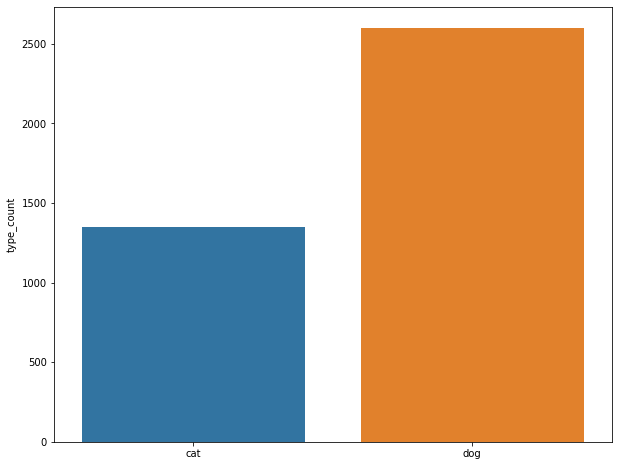

In [53]:
type_count = pets.groupby('type')['path'].count().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(x=type_count['type'].unique(), y=type_count['path']).set(ylabel='type_count')
plt.show()

In [54]:
size_count = Counter(df_labels['size'])
print(size_count)

Counter({'little': 2038, 'big': 1225, 'medium': 690})


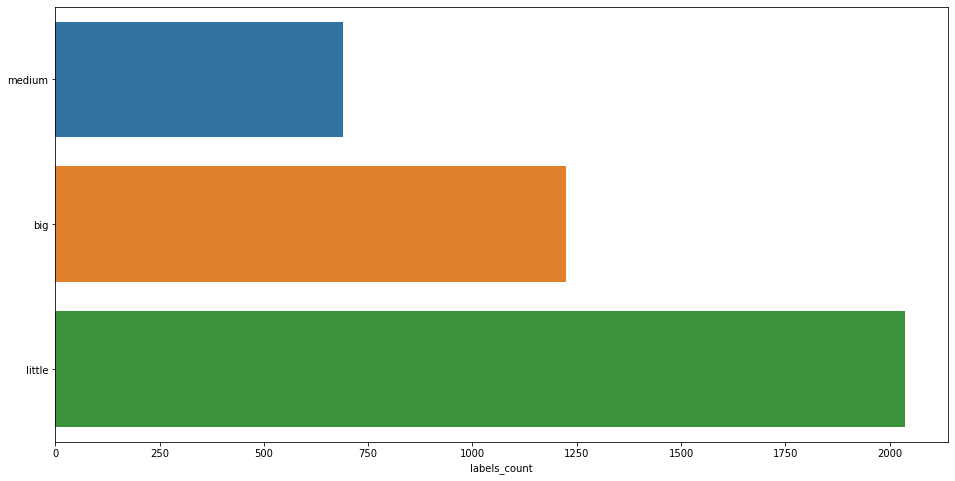

In [62]:
df_count = pd.DataFrame(size_count.items(), columns=['label', 'count'])
sort_count = df_count.sort_values('count')
plt.figure(figsize=(16, 8))
sns.barplot(x=sort_count['count'], y=sort_count['label']).set(ylabel=None, xlabel='labels_count')
plt.show()

In [63]:
breeds_count = Counter(df_labels['breed'])
print(breeds_count)

Counter({'golden retriever': 177, 'rottwiler': 176, 'pomeranian': 175, 'siamese': 175, 'labrador': 175, 'boxer': 175, 'maine coon': 175, 'pug': 174, 'abyssinian': 174, 'beagle': 174, 'german shepherd': 174, 'corgi': 173, 'bulldog': 173, 'husky': 173, 'sphynx': 172, 'american shorthair': 172, 'shiba inu': 172, 'persian': 171, 'dachshund': 171, 'ragdoll': 171, 'chihuahua': 170, 'yorkshire terrier': 170, 'mumbai': 141})


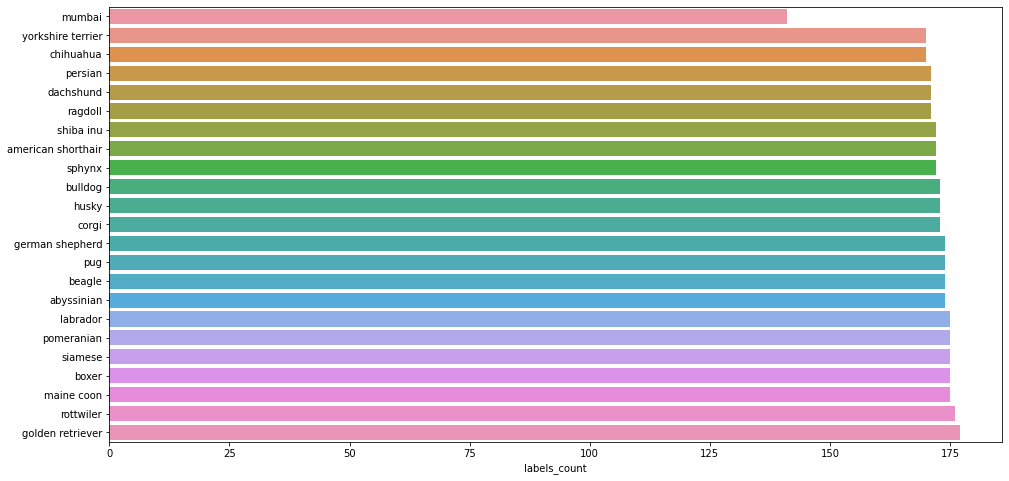

In [64]:
df_count = pd.DataFrame(breeds_count.items(), columns=['label', 'count'])
sort_count = df_count.sort_values('count')
plt.figure(figsize=(16, 8))
sns.barplot(x=sort_count['count'], y=sort_count['label']).set(ylabel=None, xlabel='labels_count')
plt.show()

In [65]:
age_count = Counter(df_labels['age'])
print(age_count)

Counter({'adult': 2918, 'puppy': 1035})


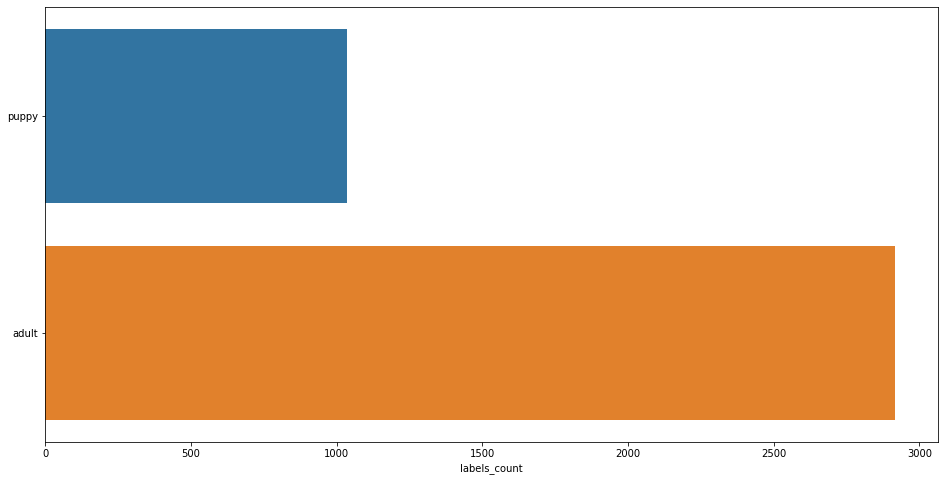

In [66]:
df_count = pd.DataFrame(age_count.items(), columns=['label', 'count'])
sort_count = df_count.sort_values('count')
plt.figure(figsize=(16, 8))
sns.barplot(x=sort_count['count'], y=sort_count['label']).set(ylabel=None, xlabel='labels_count')
plt.show()

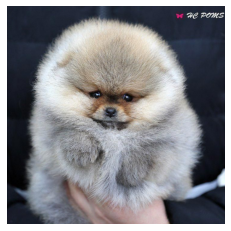

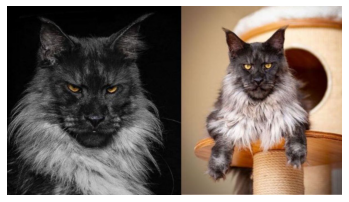

In [67]:
p = pets['path'][12]
img = mpimg.imread(f'{path}/{p}')
plt.imshow(img)
plt.axis('off')
plt.show()

p = pets['path'][3900]
img = mpimg.imread(f'{path}/{p}')
plt.imshow(img)
plt.axis('off')
plt.show()

## 5 Preparación de los datos para los algoritmos de Machine Learning

Para preparar los datos se ha utilizado la función **ImageDataGenerator** de la libreria *keras.preprocessing.image*

Se ha utilizado tres variables: 
* **img_gen**: Esta variable se ha utilizado para inicializar la función con dos parámetros: 
  
  * **rescale**: Usado para poner todas las imágenes al mismo tamaño. Se le ha indicado *1/255*
  
  * **validation_split**: Este parámetro se utiliza para reservar parte de los datos para la validación, se ha utilizado un 20%.

* **img_iter**: En esta variable se guaran los datos separados en x e y para el entrenamiento del modelo, se ha utilizado la variable anterior junto a la función *flow_from_dataframe* para indicarle que los datos seran obtenidos a partir de un DataFrame. Dentro de esta se utilizan varios parámetros:
  * **pets**: Es el DataFrame generado inicialmente con el path, la lista de etiquetas y el tipo de mascota.
  
  * **shuffle**: Se le indica *True* para que los datos esten mezclados y el modelo no pueda aprender secuencialmente.
  
  * **directory**: Ruta base donde se encuentra el dataset. Si no hubiera, los datos de la columna x deberán ser rutas absolutas.
  
  * **x_col**: Columna del DataFrame donde se encuentra los datos pasados al modelo (*path*). 
  
  * **y_col**: Columna del DataFrame donde se encuentra los datos que debera predecir el modelo (*labels*).
  
  * **class_mode**: Se le indicará *categorical* ya que permite la salida de varias etiquetas pasandole un array "one-hot".
  
  * **target_size**: Indicará el ato y ancho de todas las imágenes (*128 x 128*).
  
  * **batch_size**: Tamaño del conjunto de imágenes con el que ira aprendiendo el modelo. En este caso se le ha indicado *64*.
  
  * **subset**: Se indicá el uso que se hara para los dato. Como se ha indicado, se pone *training* para indicarle que son datos de entrenamiento.

* **img_iter_val**: Utiliza lo mismo que la variable anterior. Aunque algunos parámetros cambian:
  * **batch_size**: Este caso, el tamaño del conjunto de imágenes será *128*.
  
  * **subset**: Para esta variable se le ha indicado *validation* para indicarle que son datos de validación.

Lo descrito anterior se ha realizado para dos modelos: 
1. Clasificación de perro o gato: Para este modelo se le ha indicado que la *x* será el path, y la *y* sera el tipo (type).

2. Clasificación multi-etiqueta: En este se le indica el path también para la *x*, pero la *y* se le indica la columna label (donde se encuentran las características de la mascota).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

### Modelo 1: Perro o Gato

In [ ]:
img_gen = ImageDataGenerator(rescale=1/255, validation_split=0.2)
img_iter_1 = img_gen.flow_from_dataframe(
    pets,
    shuffle=True,
    directory=path,
    x_col='path',
    y_col='type',
    class_mode='categorical',
    target_size=(128, 128),
    batch_size=64,
    subset='training'
)

img_iter_val_1 = img_gen.flow_from_dataframe(
    pets,
    shuffle=True,
    directory=path,
    x_col='path',
    y_col='type',
    class_mode='categorical',
    target_size=(128, 128),
    batch_size=128,
    subset='validation'
)

### Modelo 2: Multi-Etiqueta

In [ ]:
img_iter_2 = img_gen.flow_from_dataframe(
    pets,
    shuffle=True,
    directory=path,
    x_col='path',
    y_col='labels',
    class_mode='categorical',
    target_size=(128, 128),
    batch_size=64,
    subset='training'
)

img_iter_val_2 = img_gen.flow_from_dataframe(
    pets,
    shuffle=True,
    directory=path,
    x_col='path',
    y_col='labels',
    class_mode='categorical',
    target_size=(128, 128),
    batch_size=128,
    subset='validation'
)

## 6 Entrenamiento del modelo y comprobación del rendimiento

### Modelo 1: Perro o Gato

### Modelo 2: Multi-Etiqueta

## 7 Procesamiento de Lenguaje Natural

## 8 Aplicación web

## 9 Conclusiones

## Codigo para probar